In [1]:
# !pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df['Customer_Segment'].unique()

array([1, 2, 3])

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/April-24/main/Dataset/Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


<Axes: xlabel='count', ylabel='Customer_Segment'>

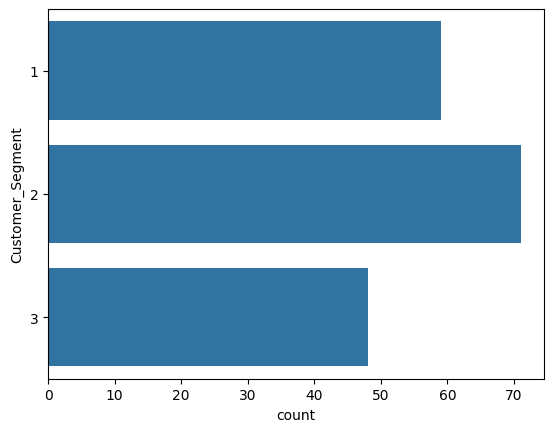

In [5]:
sns.countplot(y = df['Customer_Segment'])

# Model Building

In [6]:
x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [8]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f"Train: {dt.score(xtrain,ytrain)}")
print(f"Test: {dt.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 1.0
Test: 0.9629629629629629
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.91      1.00      0.95        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [11]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
print(f"Train: {lg.score(xtrain,ytrain)}")
print(f"Test: {lg.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 0.967741935483871
Test: 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# Automating Model building

In [12]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,yp))

In [14]:
prediction(DecisionTreeClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [15]:
prediction(LogisticRegression())

Train Accuracy: 0.967741935483871
Test Accuracy: 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [16]:
prediction(RandomForestClassifier())

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [17]:
prediction(GradientBoostingClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       0.90      0.90      0.90        21
           3       1.00      0.79      0.88        14

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



# Fine tuning Model:

In [18]:
params = {
    'n_estimators' : [90,110,150],
    'learning_rate' : [0.5,0.6,0.7,0.9,1],
    'max_depth' : [3,5,7,11],
}

In [20]:
grid = GridSearchCV(GradientBoostingClassifier(), params, verbose = 1)

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [21]:
grid.best_params_

{'learning_rate': 0.9, 'max_depth': 3, 'n_estimators': 90}

In [22]:
prediction(GradientBoostingClassifier(learning_rate = 0.9, max_depth=3, n_estimators = 110))

Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [24]:
df['Customer_Segment'].unique()

array([1, 2, 3])

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [28]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
prediction(XGBClassifier())

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [29]:
ytrain

138    3
104    2
78     2
36     1
93     2
      ..
71     2
106    2
14     1
92     2
102    2
Name: Customer_Segment, Length: 124, dtype: int64

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [31]:
ytrain

array([2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

In [32]:
prediction(XGBClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.95      0.95      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



- **Perform hyperparameter tuning for XGB**
- Learning rate
- max_depth
- lambda
- n estimators

# Stacking

In [33]:
models = []

models.append(('lg', LogisticRegression()))
models.append(('dt', DecisionTreeClassifier()))
models.append(('dt1', DecisionTreeClassifier(criterion = 'entropy')))

In [35]:
models

[('lg', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy'))]

In [36]:
prediction(StackingClassifier(estimators = models, final_estimator=RandomForestClassifier(max_depth=5)))

Train Accuracy: 0.9838709677419355
Test Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

